<a href="https://colab.research.google.com/github/ANNAPAVAN/MachineLeaning-DeepLearning/blob/main/Early_stopping_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

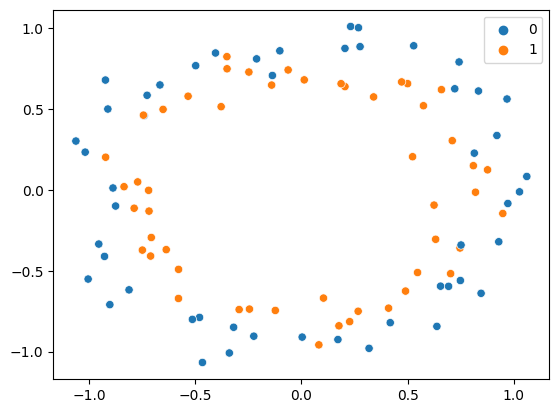

In [ ]:
# sns.scatterplot(X[:,0],X[:,1],hue=y)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

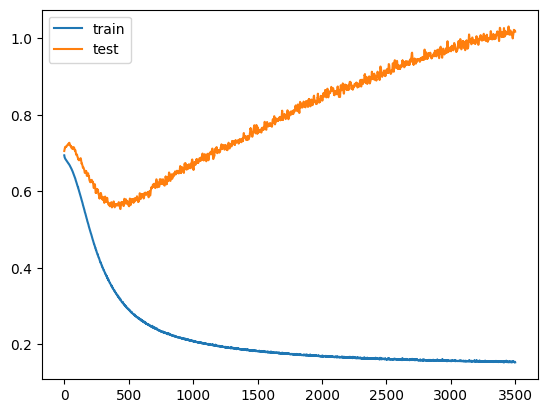

In [ ]:
plt.plot(history.history['loss'], label='train') #loss on training set
plt.plot(history.history['val_loss'], label='test') #loss on test set
plt.legend()
plt.show()

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 106ms/step - loss: 0.6774 - accuracy: 0.5625 - val_loss: 0.7244 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 65ms/step - loss: 0.6766 - accuracy: 0.5625 - val_loss: 0.7242 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 113ms/step - loss: 0.6763 - accuracy: 0.5625 - val_loss: 0.7245 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 134ms/step - loss: 0.6757 - accuracy: 0.5625 - val_loss: 0.7248 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 79ms/step - loss: 0.6747 - accuracy: 0.5625 - val_loss: 0.7253 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 105ms/step - loss: 0.6741 - accuracy: 0.5625 - val_loss: 0.7259 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 142ms/step - loss: 0.6737 - accuracy: 0.5625 - val_loss: 0.7265 - val_accuracy: 0.3500
Epoch 8/

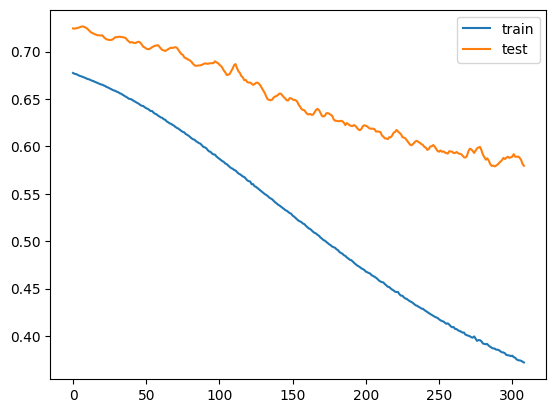

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()